## longwave variables (LW)

Longwave \
4. rlut  –  radiation longwave upwelling toa \
5. rlds  –  radiation longwave downwelling surface \
6. rlus  -  radiation longwave upwelling surface  

<br />


In [1]:
import intake
import xarray as xr
import xesmf as xe

import numpy as np
import skimage.measure as skm

import matplotlib.pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeat

import os


In [2]:
model='MPI-ESM1-2-HR'
experiment_id='historical'
period = slice('1970-01','1999-12')
member_id='r1i1p1f1'


In [3]:
def plot_snapshot(var, cmap):
    projection = ccrs.PlateCarree(central_longitude=180)
    lat = var.lat
    lon = var.lon

    f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(15, 5))

    var.plot(transform=ccrs.PlateCarree(), cbar_kwargs={'orientation': 'horizontal','pad':0.125, 'aspect':50,'fraction':0.055}, cmap=cmap)
    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())
    ax.set_title('Snapshot, model:' + model + ' exp:' + experiment_id)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])
    ax.set_yticks([-20, 0, 20])
    plt.tight_layout()

## rlut  –  radiation longwave upwelling toa

In [4]:
table_id='E3hr'
variable_id = 'rlut'
subset= intake.cat.nci['esgf'].cmip6.search(source_id=model, experiment_id=experiment_id, 
                     member_id=member_id, variable_id=variable_id, table_id=table_id) 

In [5]:
subset

,unique
project,1
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,1
table_id,1
variable_id,1
grid_label,1
date_range,33


In [6]:
dset_dict= subset.to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.version'


In [7]:
ds = dset_dict[list(dset_dict.keys())[-1]]
ds

<xarray.Dataset>
Dimensions:    (time: 482120, bnds: 2, lat: 192, lon: 384)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-01T01:30:00 ... 2014-12-31T22:30:00
  * lat        (lat) float64 -89.28 -88.36 -87.42 -86.49 ... 87.42 88.36 89.28
  * lon        (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(14608, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 -89.75 -88.82 -88.82 ... 88.82 88.82 89.75
    lon_bnds   (lon, bnds) float64 -0.4688 0.4688 0.4688 ... 358.6 358.6 359.5
    rlut       (time, lat, lon) float32 dask.array<chunksize=(14608, 192, 384), meta=np.ndarray>
Attributes: (12/49)
    parent_source_id:        MPI-ESM1-2-HR
    activity_id:             CMIP
    product:                 model-output
    sub_experiment_id:       none
    table_info:              Creation Date:(09 May 2019) MD5:e6ef8ececc8f3386...
    branch_time_in_child:    0.0
    ...                      ...
    variant_label:           r1i1p1f1
    parent_activity_id:      CMIP
    Conventions:             CF-1.7 CMIP-6.2
    references:              MPI-ESM: Mauritsen, T. et al. (2019), Developmen...
    institution_id:          MPI-M
    intake_esm_dataset_key:  CMIP6.CMIP.MPI-M.MPI-ESM1-2-HR.historical.r1i1p1...

In [8]:
rlut=ds.rlut.sel(time=period, lon=slice(0,360),lat=slice(-30,30))
rlut

<xarray.DataArray 'rlut' (time: 87656, lat: 64, lon: 384)>
dask.array<getitem, shape=(87656, 64, 384), dtype=float32, chunksize=(14616, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T01:30:00 ... 1999-12-31T22:30:00
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    standard_name:  toa_outgoing_longwave_flux
    long_name:      TOA Outgoing Longwave Radiation
    comment:        at the top of the atmosphere (to be compared with satelli...
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:10Z altered by CMOR: Changed sign. 2019-...

In [9]:
rlut_daily = rlut.resample(time='1D').mean(dim='time', keep_attrs=True)
rlut_daily

<xarray.DataArray 'rlut' (time: 10957, lat: 64, lon: 384)>
dask.array<stack, shape=(10957, 64, 384), dtype=float32, chunksize=(1, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 ... 1999-12-31
Attributes:
    standard_name:  toa_outgoing_longwave_flux
    long_name:      TOA Outgoing Longwave Radiation
    comment:        at the top of the atmosphere (to be compared with satelli...
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:10Z altered by CMOR: Changed sign. 2019-...

In [10]:
rlut_day=rlut_daily.isel(time=slice(0, 4))

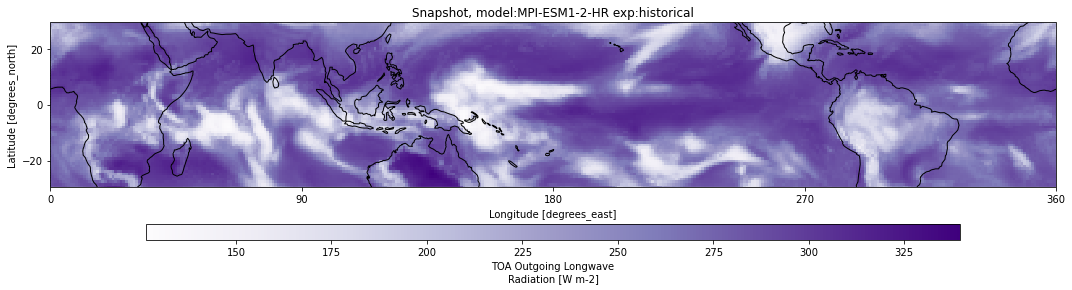

In [11]:
plot_snapshot(rlut_day.isel(time=0), 'Purples')

In [12]:
save = True
if save:
    folder = '/g/data/k10/cb4968/cmip6/' + model
    os.makedirs(folder, exist_ok=True)

    fileName = model + '_lw_rlut_' + experiment_id + '.nc'
    path = folder + '/' + fileName
    if os.path.exists(path):
        os.remove(path)    

    xr.Dataset({'rlut_day': rlut_day}).to_netcdf(path)

In [13]:
del rlut_daily
del rlut

## rlds  –  radiation longwave downwelling surface

In [14]:
table_id='3hr'
variable_id = 'rlds'
subset= intake.cat.nci['esgf'].cmip6.search(source_id=model, experiment_id=experiment_id, 
                     member_id=member_id, variable_id=variable_id, table_id=table_id) 

In [15]:
subset

,unique
project,1
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,1
table_id,1
variable_id,1
grid_label,1
date_range,33


In [16]:
dset_dict= subset.to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.version'


In [17]:
ds = dset_dict[list(dset_dict.keys())[-1]]
ds

<xarray.Dataset>
Dimensions:    (time: 482120, bnds: 2, lat: 192, lon: 384)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-01T01:30:00 ... 2014-12-31T22:30:00
  * lat        (lat) float64 -89.28 -88.36 -87.42 -86.49 ... 87.42 88.36 89.28
  * lon        (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(14608, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 -89.75 -88.82 -88.82 ... 88.82 88.82 89.75
    lon_bnds   (lon, bnds) float64 -0.4688 0.4688 0.4688 ... 358.6 358.6 359.5
    rlds       (time, lat, lon) float32 dask.array<chunksize=(14608, 192, 384), meta=np.ndarray>
Attributes: (12/49)
    parent_source_id:        MPI-ESM1-2-HR
    activity_id:             CMIP
    product:                 model-output
    sub_experiment_id:       none
    table_info:              Creation Date:(09 May 2019) MD5:e6ef8ececc8f3386...
    branch_time_in_child:    0.0
    ...                      ...
    variant_label:           r1i1p1f1
    parent_activity_id:      CMIP
    Conventions:             CF-1.7 CMIP-6.2
    references:              MPI-ESM: Mauritsen, T. et al. (2019), Developmen...
    institution_id:          MPI-M
    intake_esm_dataset_key:  CMIP6.CMIP.MPI-M.MPI-ESM1-2-HR.historical.r1i1p1...

In [18]:
rlds=ds.rlds.sel(time=period, lon=slice(0,360),lat=slice(-30,30))
rlds

<xarray.DataArray 'rlds' (time: 87656, lat: 64, lon: 384)>
dask.array<getitem, shape=(87656, 64, 384), dtype=float32, chunksize=(14616, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T01:30:00 ... 1999-12-31T22:30:00
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    standard_name:  surface_downwelling_longwave_flux_in_air
    long_name:      Surface Downwelling Longwave Radiation
    comment:        The surface called 'surface' means the lower boundary of ...
    units:          W m-2
    original_name:  rlds
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:04Z altered by CMOR: replaced missing va...

In [19]:
rlds_daily = rlds.resample(time='1D').mean(dim='time', keep_attrs=True)
rlds_daily

<xarray.DataArray 'rlds' (time: 10957, lat: 64, lon: 384)>
dask.array<stack, shape=(10957, 64, 384), dtype=float32, chunksize=(1, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 ... 1999-12-31
Attributes:
    standard_name:  surface_downwelling_longwave_flux_in_air
    long_name:      Surface Downwelling Longwave Radiation
    comment:        The surface called 'surface' means the lower boundary of ...
    units:          W m-2
    original_name:  rlds
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:04Z altered by CMOR: replaced missing va...

In [20]:
rlds_day=rlds_daily.isel(time=slice(0, 4))

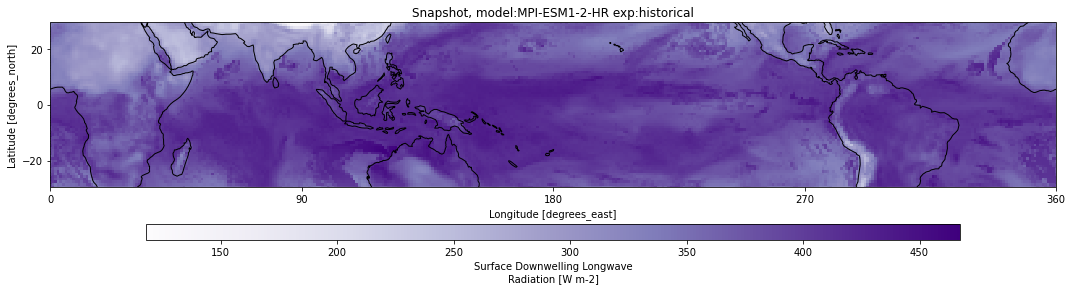

In [21]:
plot_snapshot(rlds_day.isel(time=0), 'Purples')

In [22]:
save = True
if save:
    folder = '/g/data/k10/cb4968/cmip6/' + model
    os.makedirs(folder, exist_ok=True)

    fileName = model + '_lw_rlds_' + experiment_id + '.nc'
    path = folder + '/' + fileName
    if os.path.exists(path):
        os.remove(path)    

    xr.Dataset({'rlds_day': rlds_day}).to_netcdf(path)

In [23]:
del rlds
del rlds_daily

## rlus  -  radiation longwave upwelling surface

In [24]:
# ds = xr.open_dataset('/g/data/k10/cb4968/cmip6/' + model + 'l')
# rlut_day = ds.rlut
# ds = xr.open_dataset('rlds_longwave.nc')
# rlds_day = ds.rlds

FileNotFoundError: [Errno 2] No such file or directory: b'/g/data/k10/cb4968/phd/cmip6_scripts/rlut_longwave.nc'

In [25]:
table_id='3hr'
variable_id = 'rlus'
subset= intake.cat.nci['esgf'].cmip6.search(source_id=model, experiment_id=experiment_id, 
                     member_id=member_id, variable_id=variable_id, table_id=table_id) 

In [26]:
subset

,unique
project,1
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,1
table_id,1
variable_id,1
grid_label,1
date_range,33


In [27]:
dset_dict= subset.to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.version'


In [28]:
ds = dset_dict[list(dset_dict.keys())[-1]]
ds

<xarray.Dataset>
Dimensions:    (time: 482120, bnds: 2, lat: 192, lon: 384)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-01T01:30:00 ... 2014-12-31T22:30:00
  * lat        (lat) float64 -89.28 -88.36 -87.42 -86.49 ... 87.42 88.36 89.28
  * lon        (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(14608, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 -89.75 -88.82 -88.82 ... 88.82 88.82 89.75
    lon_bnds   (lon, bnds) float64 -0.4688 0.4688 0.4688 ... 358.6 358.6 359.5
    rlus       (time, lat, lon) float32 dask.array<chunksize=(14608, 192, 384), meta=np.ndarray>
Attributes: (12/49)
    parent_source_id:        MPI-ESM1-2-HR
    activity_id:             CMIP
    product:                 model-output
    sub_experiment_id:       none
    table_info:              Creation Date:(09 May 2019) MD5:e6ef8ececc8f3386...
    branch_time_in_child:    0.0
    ...                      ...
    variant_label:           r1i1p1f1
    parent_activity_id:      CMIP
    Conventions:             CF-1.7 CMIP-6.2
    references:              MPI-ESM: Mauritsen, T. et al. (2019), Developmen...
    institution_id:          MPI-M
    intake_esm_dataset_key:  CMIP6.CMIP.MPI-M.MPI-ESM1-2-HR.historical.r1i1p1...

In [29]:
rlus=ds.rlus.isel(time=slice(43800*8+8*28+8, (43800+10950)*8+8*36)).sel(lon=slice(0,360),lat=slice(-30,30)) #.sel(time=slice(period), lon=slice(0,360),lat=slice(-30,30))
rlus

<xarray.DataArray 'rlus' (time: 87656, lat: 64, lon: 384)>
dask.array<getitem, shape=(87656, 64, 384), dtype=float32, chunksize=(14616, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T01:30:00 ... 1999-12-31T22:30:00
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    standard_name:  surface_upwelling_longwave_flux_in_air
    long_name:      Surface Upwelling Longwave Radiation
    comment:        The surface called 'surface' means the lower boundary of ...
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:05Z altered by CMOR: Changed sign. 2019-...

In [30]:
rlus_daily = rlus.resample(time='1D').mean(dim='time', keep_attrs=True)
rlus_daily

<xarray.DataArray 'rlus' (time: 10957, lat: 64, lon: 384)>
dask.array<stack, shape=(10957, 64, 384), dtype=float32, chunksize=(1, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 ... 1999-12-31
Attributes:
    standard_name:  surface_upwelling_longwave_flux_in_air
    long_name:      Surface Upwelling Longwave Radiation
    comment:        The surface called 'surface' means the lower boundary of ...
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:05Z altered by CMOR: Changed sign. 2019-...

In [31]:
rlus_day=rlus_daily.isel(time=slice(0, 4))
rlus_day

<xarray.DataArray 'rlus' (time: 4, lat: 64, lon: 384)>
dask.array<getitem, shape=(4, 64, 384), dtype=float32, chunksize=(1, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 1970-01-03 1970-01-04
Attributes:
    standard_name:  surface_upwelling_longwave_flux_in_air
    long_name:      Surface Upwelling Longwave Radiation
    comment:        The surface called 'surface' means the lower boundary of ...
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:05Z altered by CMOR: Changed sign. 2019-...

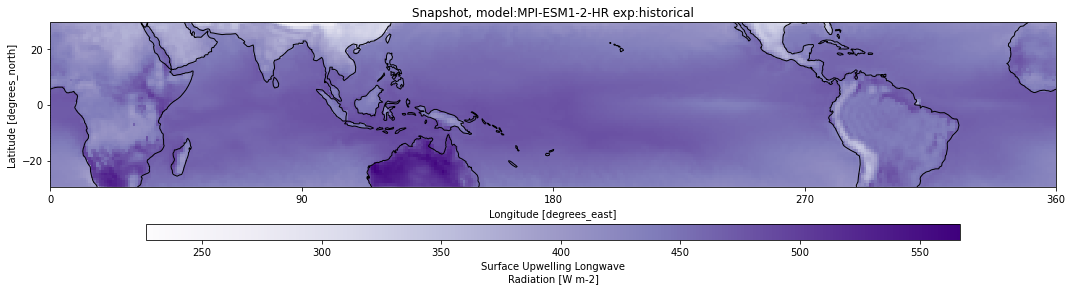

In [32]:
plot_snapshot(rlus_day.isel(time=0), 'Purples')

In [ ]:
del rlus
del rlus_daily 

In [ ]:
# longwave radiation
save = True
if save:
    folder = '/g/data/k10/cb4968/cmip6/' + model
    os.makedirs(folder, exist_ok=True)

    fileName = model + '_lw_' + experiment_id + '.nc'
    path = folder + '/' + fileName
    if os.path.exists(path):
        os.remove(path)    

    xr.Dataset({'rlut_day': rlut_day, 
                'rlds_day': rlds_day,
                'rlus_day': rlus_day}).to_netcdf(path)